In [86]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

from matplotlib import image

import scipy.ndimage as scipy_ndimage

from scipy import signal as scipy_signal
from scipy import stats as scipy_stats


# Smoothing Methods

<h3>

We've now seen fitting - where we fit noisy data with a fixed function with some parameters. 

We've also seen interpolation - where we draw a line through data without assuming any underlying shape.

Now we want to look at one more concept - smoothing.  We often have data with lots of noise, and we want to smooth the data somehow to get rid of noise and see the signal underneither.  Note that by "noise" I don't always just mean random noise.  It could also mean removing daily variations from a long-term data set or take out long-term variations so you can see a seasonal trend.

So let's take a look at some smoothing methods:

# Moving Average

<h3>

Let's look at an example using the sunpot data we've seen before.  It's noisy on a monthly basis, but there are clearly long-term trens and some periodic-ish variation.
    

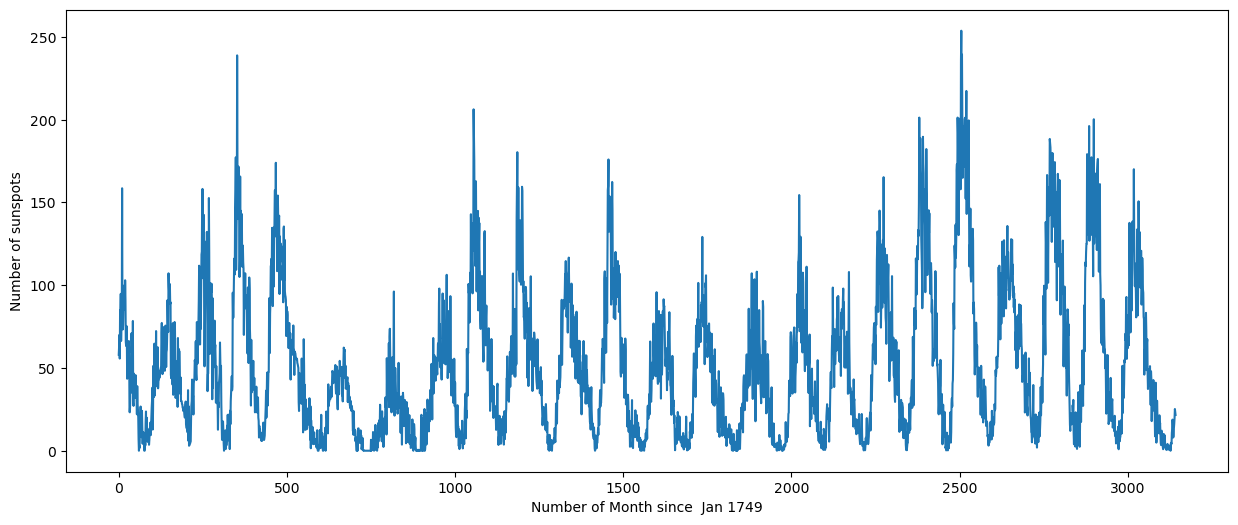

In [2]:
#Plot Sunspot versus time


# Loaded the data
sunspots = np.loadtxt("sunspots.txt")

#print (sunspots.shape)

# Plot # sunspot vs time in month number 
plt.figure(figsize=(15,6))

plt.plot(sunspots[:,0],sunspots[:,1])
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.show()


<h3>
    
One way to smooth is to average over some number of samples.  This is going to truncate the data, becuase you can't extend beyond the ends.
    
Dealing with the ends is always a problem for smoothing.  It's especially sa problem for something like this, because what we really want to do is predict what heppens next.  

For our first moving average, what we're going to do is take the average of the previous X months of data.  This will make the most recnet average good, but not have an average for the first X months:


3143 3096


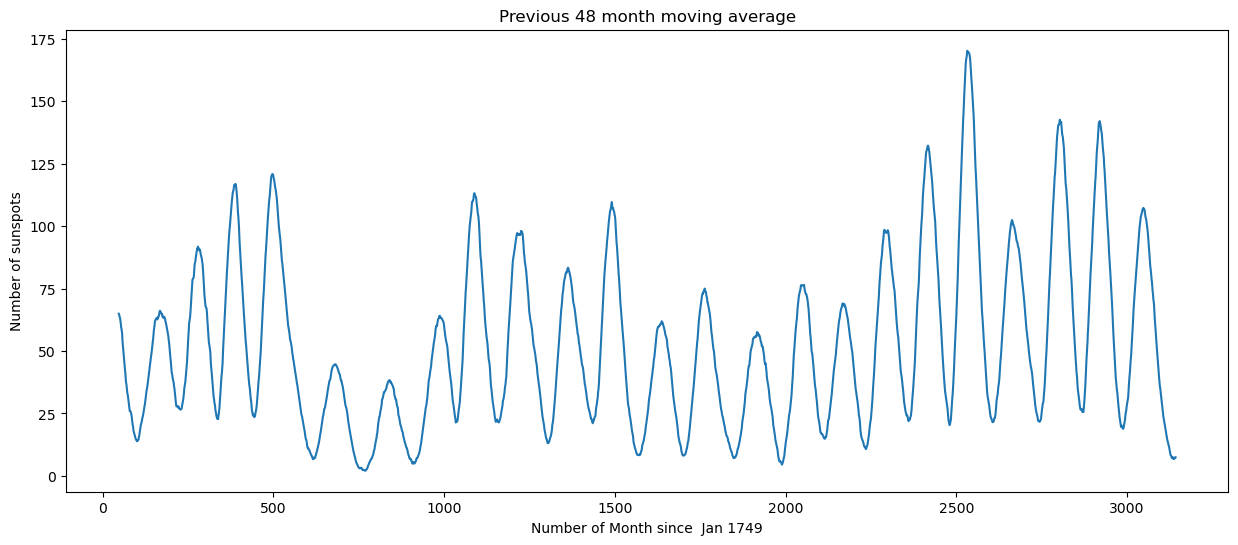

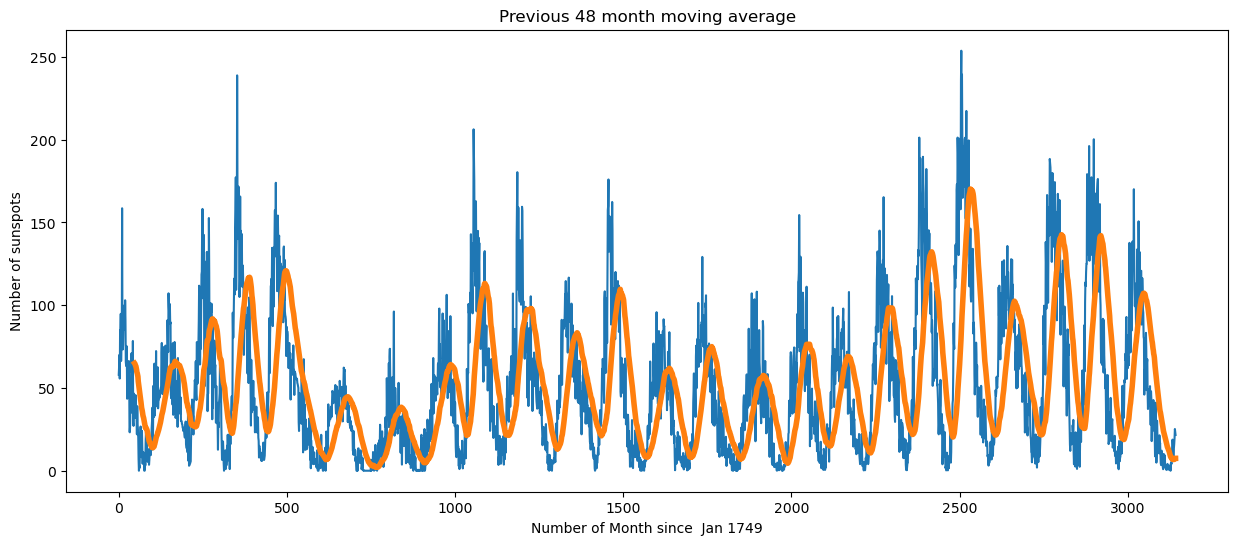

In [3]:
# Now do some smoothing:

def moving_average(y,x):
    N = y.size
    smooth = np.zeros(N-x+1)
    for i in np.arange(N-x+1):
        smooth[i] = np.sum(y[i:i+x])/x
    return smooth


t_n = sunspots[:,0]
y_n = sunspots[:,1]

N = y_n.size

#ssn_moving_average = moving_average(y_n,48)

N_avg = 48  # number of month to smooth over

ssn_moving_average = moving_average(y_n,N_avg)

print(N,ssn_moving_average.size)


plt.figure(figsize=(15,6))

# To get everything to line up properly, we need to start plotting out smoothed data at N_avg months

plt.plot(t_n[N_avg-1:],ssn_moving_average)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Previous '+str(N_avg)+' month moving average')
plt.show()



plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_n[N_avg-1:],ssn_moving_average,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Previous '+str(N_avg)+' month moving average')
plt.show()



<h3>

We can see that the data doesn't really line up with the peaks, becasue we are smoothing over the PREVIOUS X number of months.

We can make things like up better if we average over the X months in either direction:

N =  3143
3096
[  24   25   26 ... 3116 3117 3118]
[  24.   25.   26. ... 3117. 3118. 3119.]
3143 3096 3096


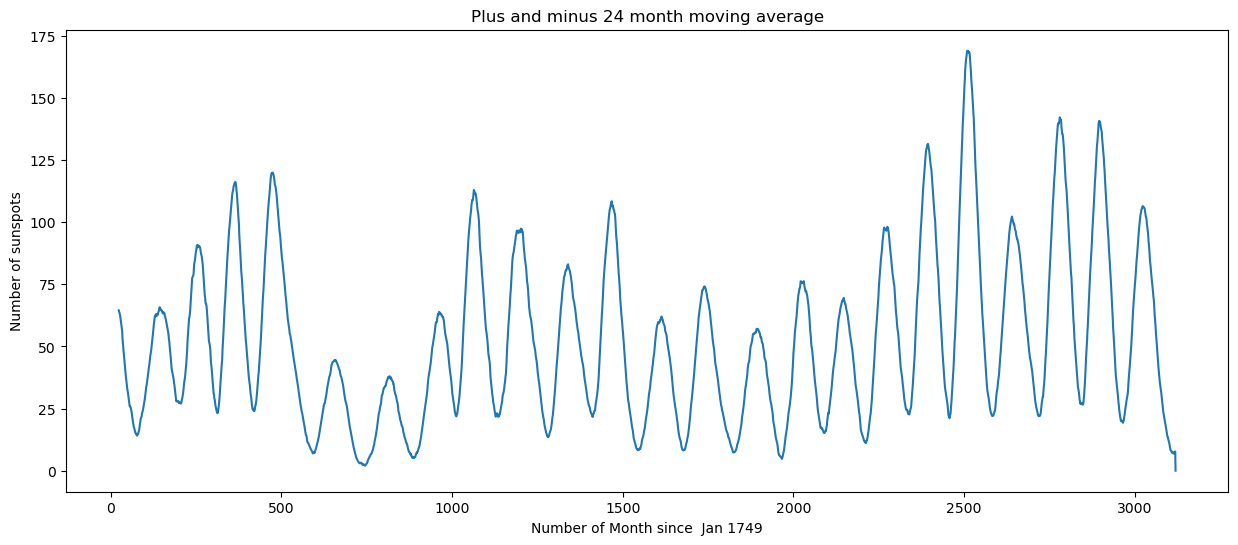

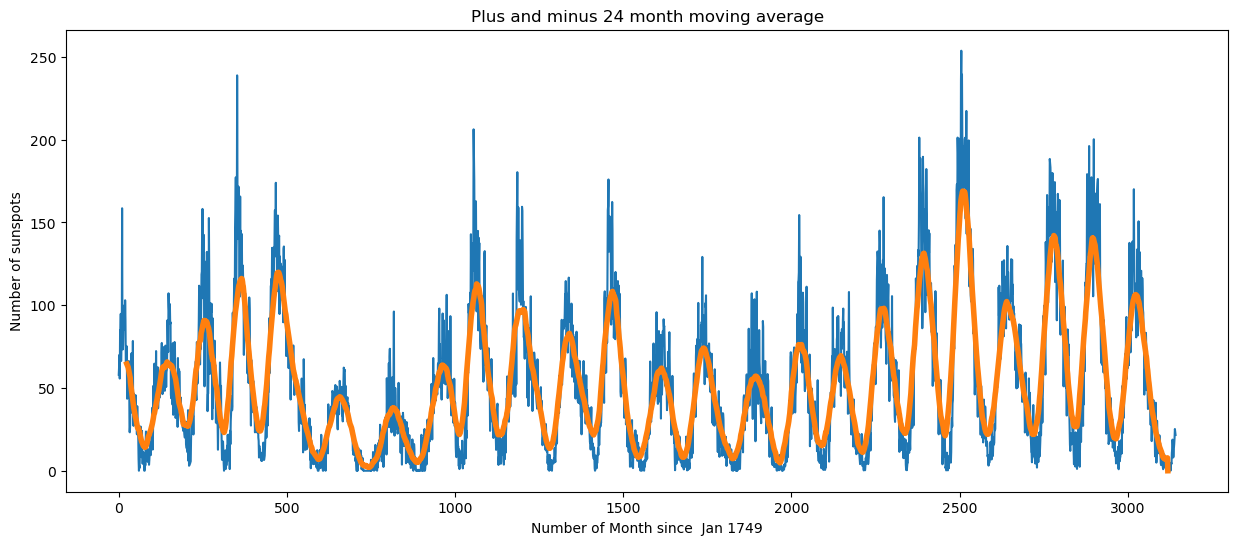

In [4]:
# Now do some smoothing:

# Let's also feed in a time, so we get back the right locations where we've done the average:


def moving_average_center(y,x,t):
    N = y.size

    # Average over -/+ x months:
    smooth = np.zeros(N-2*x+1)
    print(smooth.size)
    print(np.arange(x,N-x))
    for i in np.arange(x,N-x):
        smooth[i-x] = np.sum(y[i-x:i+x+1])/(2*x+1)
        #print(i-x,i+x+1)
        #print(y[i-x:i+x+1].size)
        #print(i)
    smooth_t = t[x:N-x+1]
    print(smooth_t)
    #print(t)
    return smooth,smooth_t


t_n = sunspots[:,0]
y_n = sunspots[:,1]

N = y_n.size

print('N = ',N)

#ssn_moving_average = moving_average(y_n,48)

N_avg = 24  # number of month to smooth over

ssn_moving_average_center,t_center = moving_average_center(y_n,N_avg,t_n)

print(N,ssn_moving_average.size,t_center.size)


plt.figure(figsize=(15,6))

# To get everything to line up properly, we need to start plotting out smoothed data at N_avg months

plt.plot(t_center,ssn_moving_average_center)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Plus and minus '+str(N_avg)+' month moving average')
plt.show()



plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_center,ssn_moving_average_center,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Plus and minus '+str(N_avg)+' month moving average')
plt.show()


<h3>

This lines up better, but both ends are truncated.

We could deal with the ends by making some choices.  Either we don't include data past the end in out average, so we average over fewer data points at the ends.  

Or we could assume the data is constant at the ends, or that it is periodic and wraps around.

Let's do an example of not including data past the ends in out average:

N =  3143
[0.000e+00 1.000e+00 2.000e+00 ... 3.140e+03 3.141e+03 3.142e+03]
3143 3096 3096


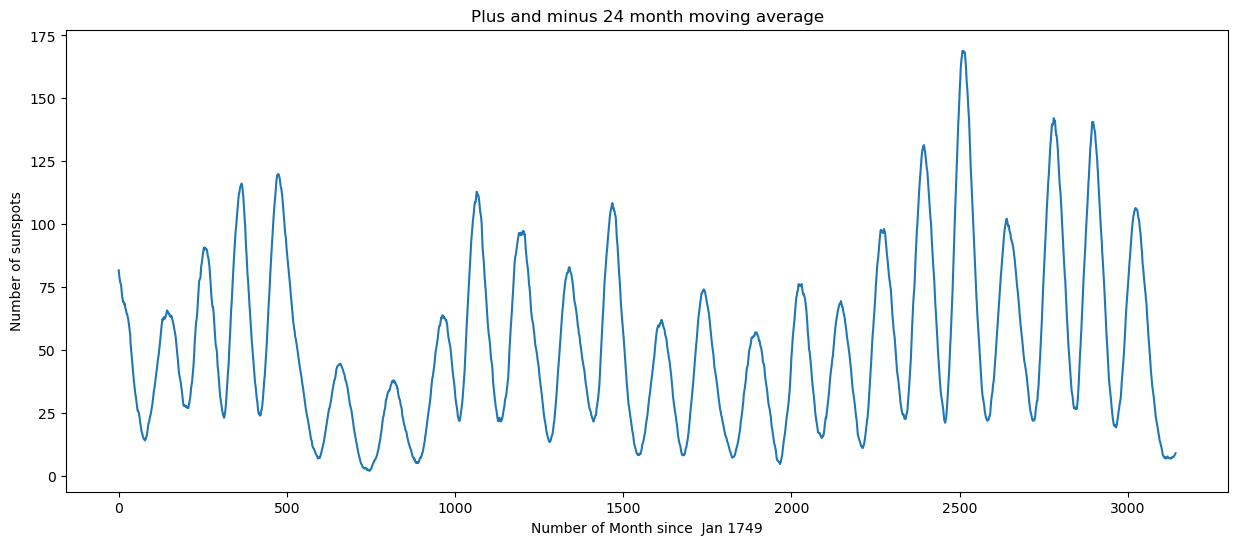

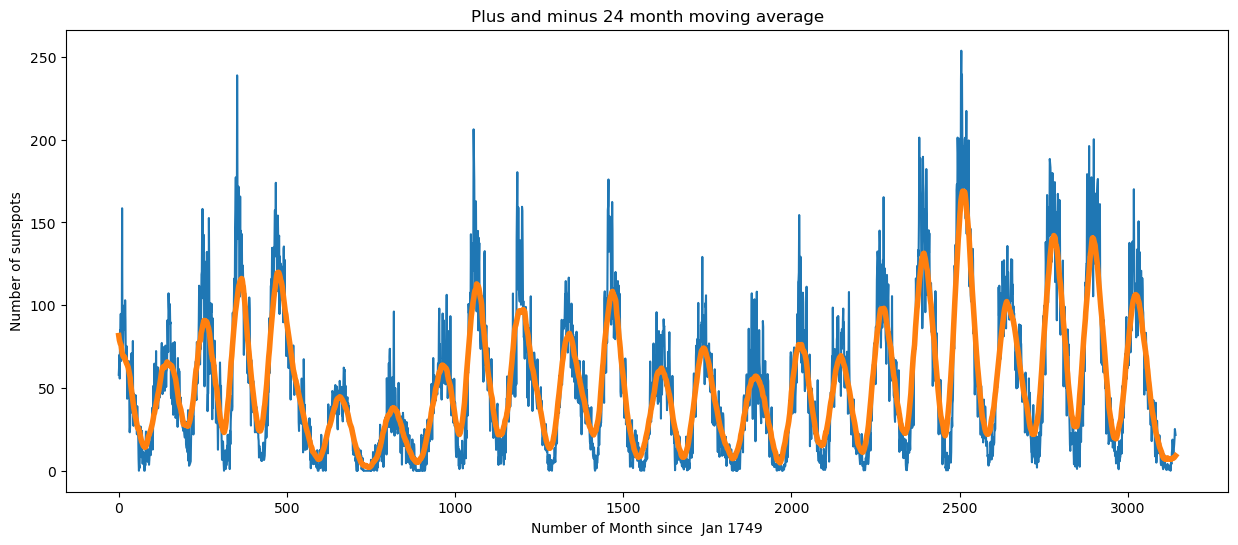

In [47]:
# Centeral average with truncated data at the ends:

def moving_average_center_trunc(y,x,t):
    N = y.size

    # Average over -/+ x months:
    smooth = np.zeros(N)
    #print(smooth.size)
    #print(np.arange(x,N-x))
    for i in np.arange(0,N):
        ll = np.max([i-x,0])    # lower limit for this average
        ul = np.min([i+x+1,N])  # upper limit for this average
        nn = ul-ll
        #print(ll,ul,nn)
        smooth[i] = np.sum(y[ll:ul])/nn
        #print(i-x,i+x+1)
        #print(y[i-x:i+x+1].size)
        #print(i)
    smooth_t = t
    print(smooth_t)
    #print(t)
    return smooth,smooth_t


t_n = sunspots[:,0]
y_n = sunspots[:,1]

N = y_n.size

print('N = ',N)

#ssn_moving_average = moving_average(y_n,48)

N_avg = 24  # number of month to smooth over

ssn_moving_average_center_trunc,t_center_trunc = moving_average_center_trunc(y_n,N_avg,t_n)

print(N,ssn_moving_average.size,t_center.size)


plt.figure(figsize=(15,6))

# To get everything to line up properly, we need to start plotting out smoothed data at N_avg months

plt.plot(t_center_trunc,ssn_moving_average_center_trunc)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Plus and minus '+str(N_avg)+' month moving average')
plt.show()



plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_center_trunc,ssn_moving_average_center_trunc,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Plus and minus '+str(N_avg)+' month moving average')
plt.show()


# Triangle Smoothing

<h3>

This doesn't look too bad.  But we can see the ends seem a little wonky.

Another option is to weight the data near each point by distance, rather than just using all the data in a fixed window instantly.

Let's try a triangular smoothing - we'll weight as a fraction that depends how far away we are, like this:

69


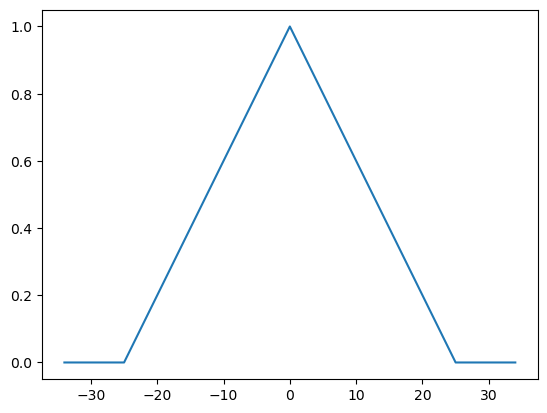

In [48]:

xx = np.arange(-N_avg-10,N_avg+11)
yy = np.fmax(1-np.abs(xx)/(N_avg+1),np.zeros(xx.size))

print(xx.size)

plt.plot(xx,yy)
plt.show()


<h3>

Let's incoporate this into our last smoothing function:
    
</h3>

N =  3143
49
[0.000e+00 1.000e+00 2.000e+00 ... 3.140e+03 3.141e+03 3.142e+03]
3143 3096 3096


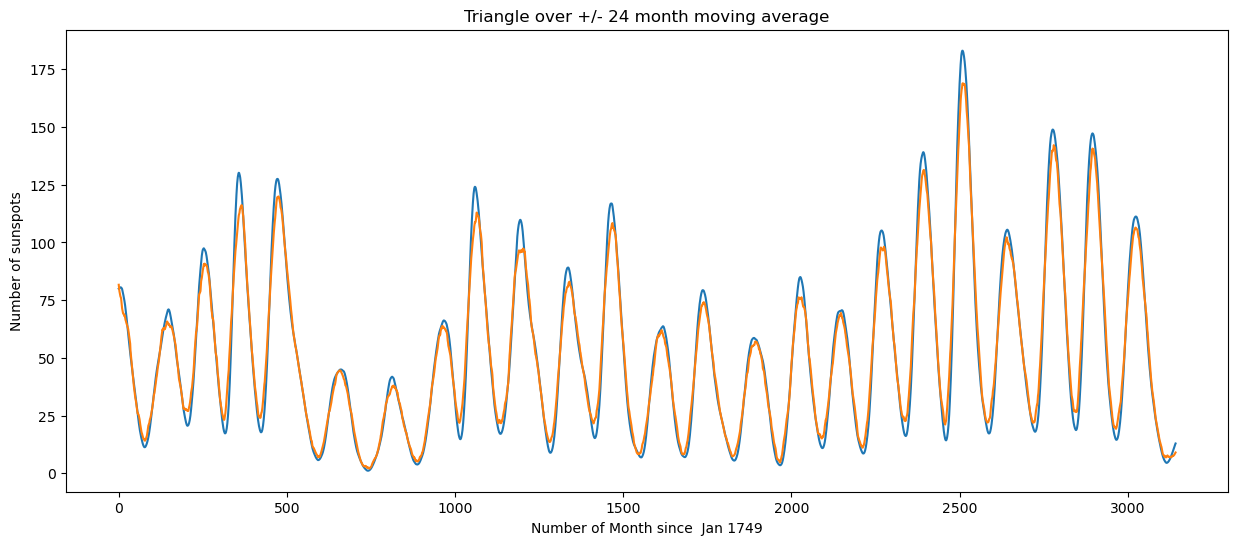

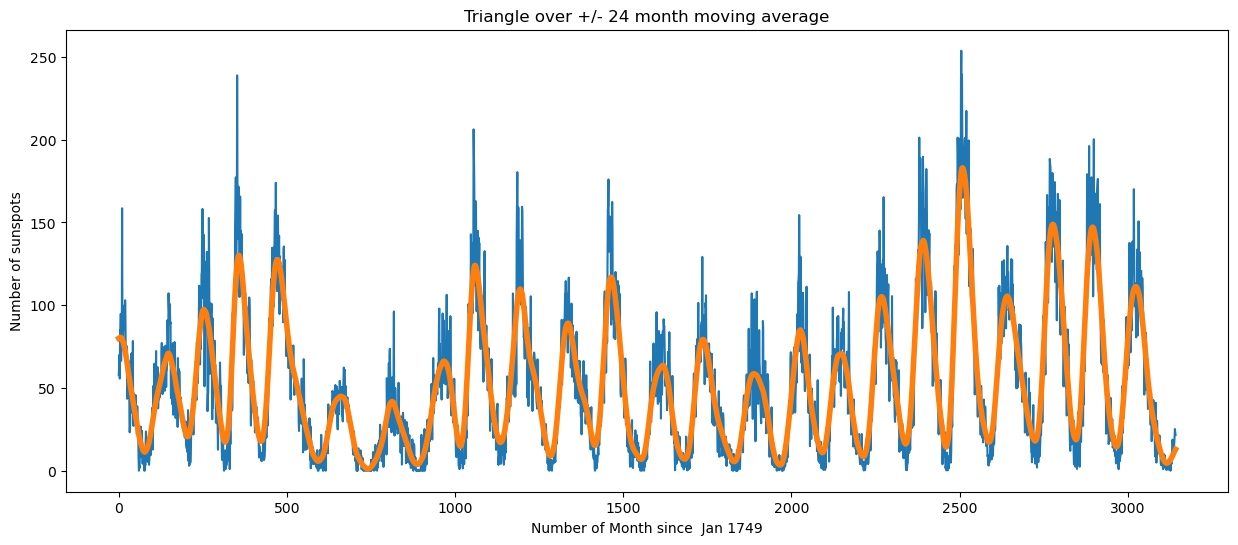

In [50]:
# Trianagle average with truncation:

def triangle_average(y,x,t):
    N = y.size

    # Average over -/+ x months:
    smooth = np.zeros(N)

    # Weight each point in our window

    xx = np.arange(-N_avg,N_avg+1)
    weight = np.fmax(1-np.abs(xx)/(N_avg+1),np.zeros(xx.size))  # N_avg+1 so the ends aren't zero.
    print(weight.size)
    
    #print(smooth.size)
    #print(np.arange(x,N-x))
    for i in np.arange(0,N):
        ll = np.max([i-x,0])    # lower limit for this average
        ul = np.min([i+x+1,N])  # upper limit for this average
        #print(x,ll,ul,x-i+ll,x-i+ul)
        lw = weight[x-i+ll:x-i+ul]
        wt = np.sum(lw)
        
        smooth[i] = np.sum(y[ll:ul]*lw)/wt
        #print(i-x,i+x+1)
        #print(y[i-x:i+x+1].size)
        #print(i)
    smooth_t = t
    print(smooth_t)
    #print(t)
    return smooth,smooth_t


t_n = sunspots[:,0]
y_n = sunspots[:,1]

N = y_n.size

print('N = ',N)

#ssn_moving_average = moving_average(y_n,48)

N_avg = 24  # number of month to smooth over

ssn_triangle,t_triangle = triangle_average(y_n,N_avg,t_n)

print(N,ssn_moving_average.size,t_center.size)


plt.figure(figsize=(15,6))

# To get everything to line up properly, we need to start plotting out smoothed data at N_avg months

plt.plot(t_triangle,ssn_triangle)
plt.plot(t_center_trunc,ssn_moving_average_center_trunc)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Triangle over +/- '+str(N_avg)+' month moving average')
plt.show()



plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_triangle,ssn_triangle,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Triangle over +/- '+str(N_avg)+' month moving average')
plt.show()


#plt.plot(t_center_trunc,ssn_triangle/ssn_moving_average_center_trunc)
#plt.show()


# Gaussian Smoothing

<h3>

The triangle averaging is a little more peaky at the peaks and a little bettwe looking at the ends, but still resonable smooth.

We could also use some other function, even something that incoporates all the data.  An example of this is gaussian smoothing.  Rather than a box or a triangle, we use a Gaussian with some width.

Rather than do this by hand, we'll use a built-in function.

scipy.ndimage.gaussian_filter1d is a way to do this in 1D.  It takes sigma (the standard deviation of the gaussian) as an argument.  It might be more convinient to use the full-width half-maximum and convert to sigma.

    
</h3> 

3143 3143


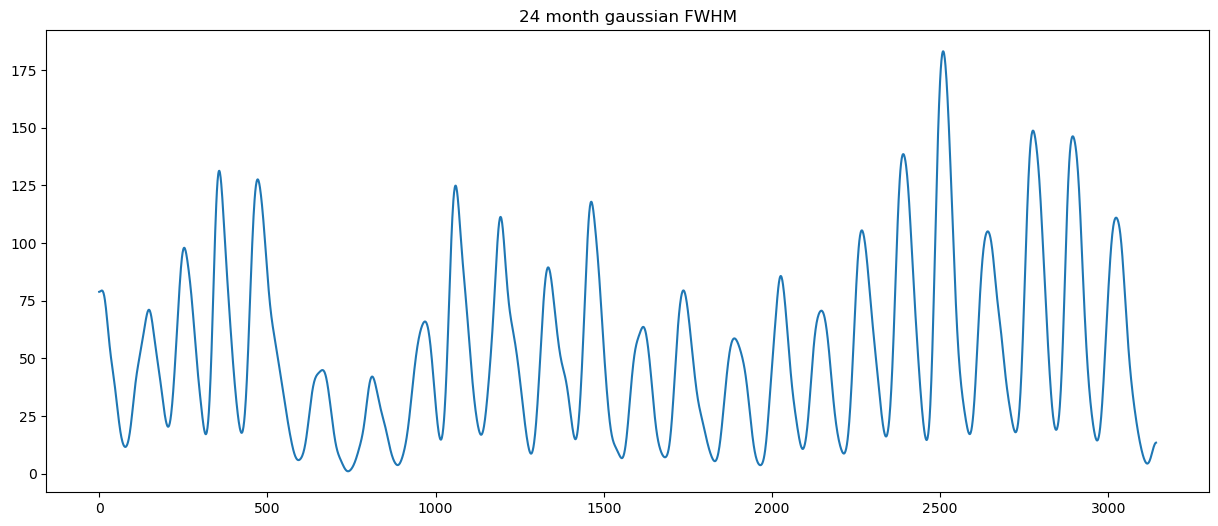

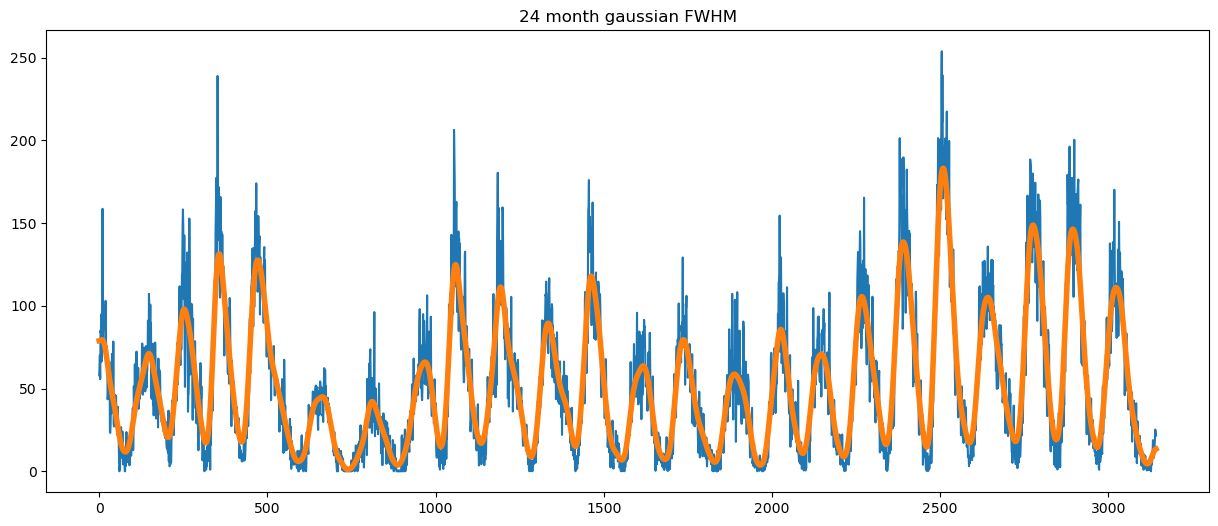

In [8]:

fwhm = 24
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
ssn_gauss = scipy_ndimage.gaussian_filter1d(y_n,sigma)

print(N,ssn_gauss.size)

plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_gauss)
plt.title('24 month gaussian FWHM')
plt.show()


plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_n,ssn_gauss,linewidth=4)
plt.title('24 month gaussian FWHM')
plt.show()



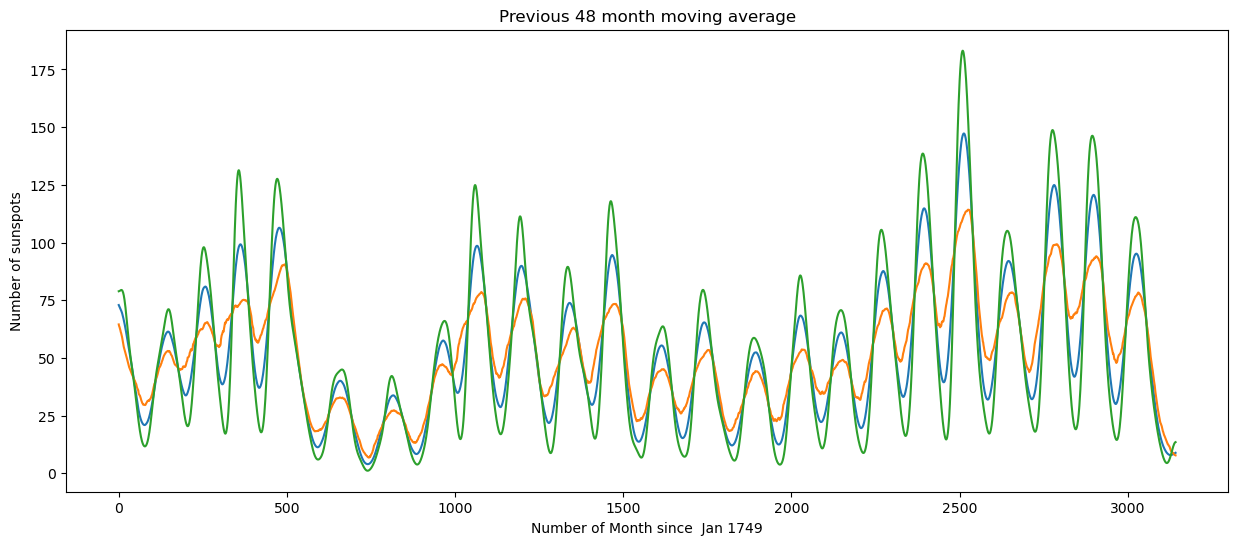

In [9]:
# Let's compare the different methods:

plt.figure(figsize=(15,6))

plt.plot(t_triangle,ssn_triangle)
plt.plot(t_center_trunc,ssn_moving_average_center_trunc)
plt.plot(t_n,ssn_gauss)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


<h3>

Doesn't look too bad for this data.  Actually, the triangle and gaussian look almost the same.

Let's subtract them to see the difference:
    
</h3>

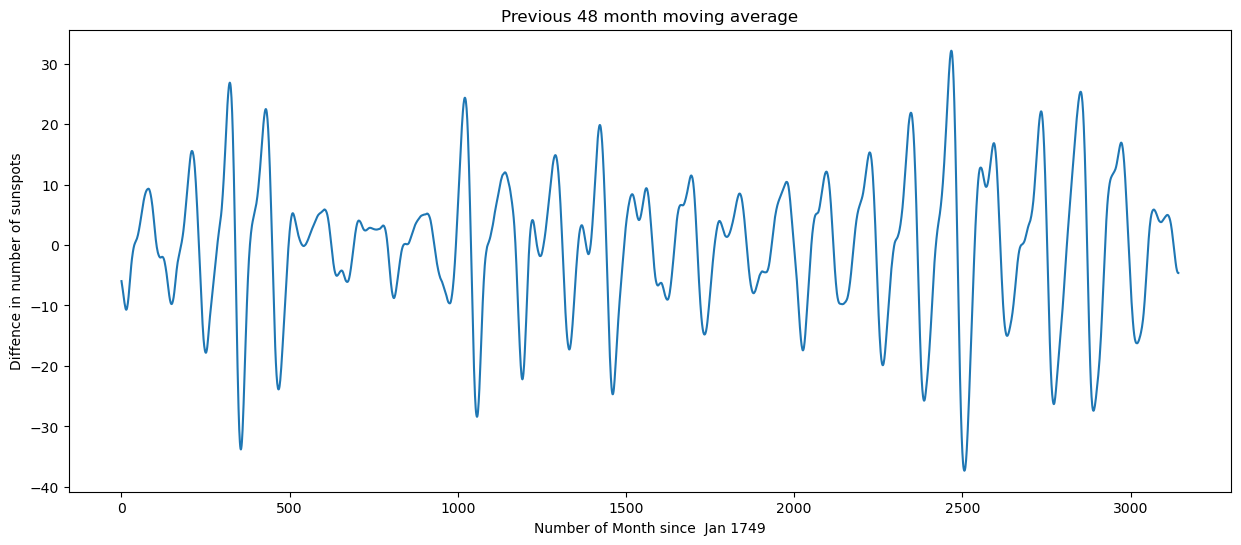

In [10]:
plt.figure(figsize=(15,6))

plt.plot(t_triangle,ssn_triangle-ssn_gauss)
#plt.plot(t_triangle,ssn_moving_average_center_trunc-ssn_gauss)
#plt.plot(t_center_trunc,ssn_moving_average_center_trunc)
#plt.plot(t_n,ssn_gauss)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


<h3>

Again, how the edges are handled matters.  The default is to reflect, which repeates the data again in reverse order at each end.  Effectively, this weights the points towards the end more near the ends.
    
Either this or 'mirror' is probably best for this data.  But in some case we may know our data is periodic or fixed at the ends, in which case 'warp' or 'nearest' may be appropriate:

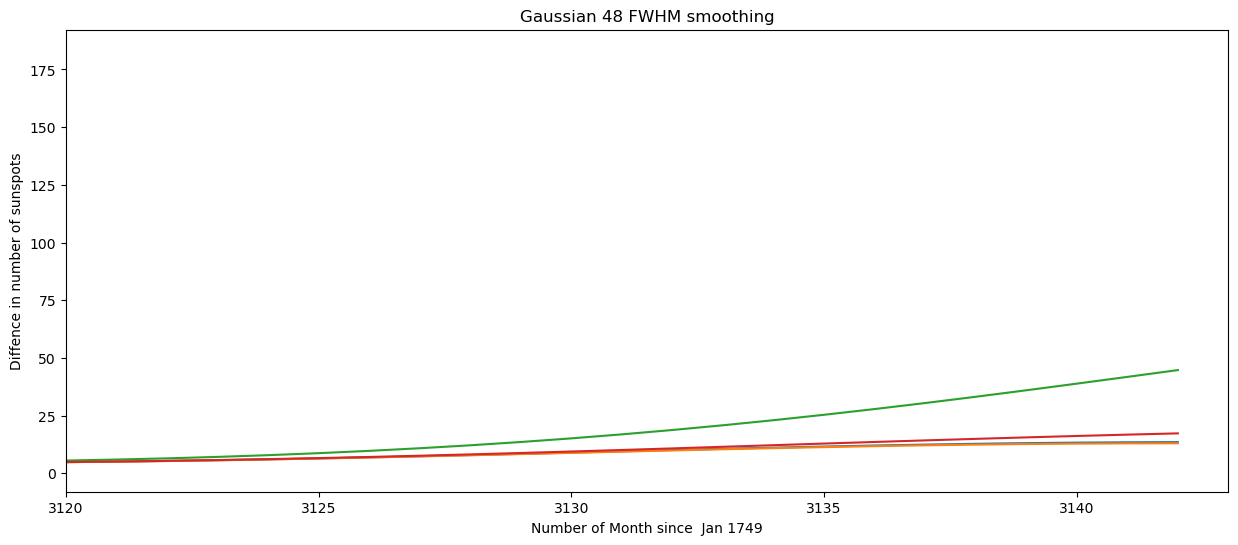

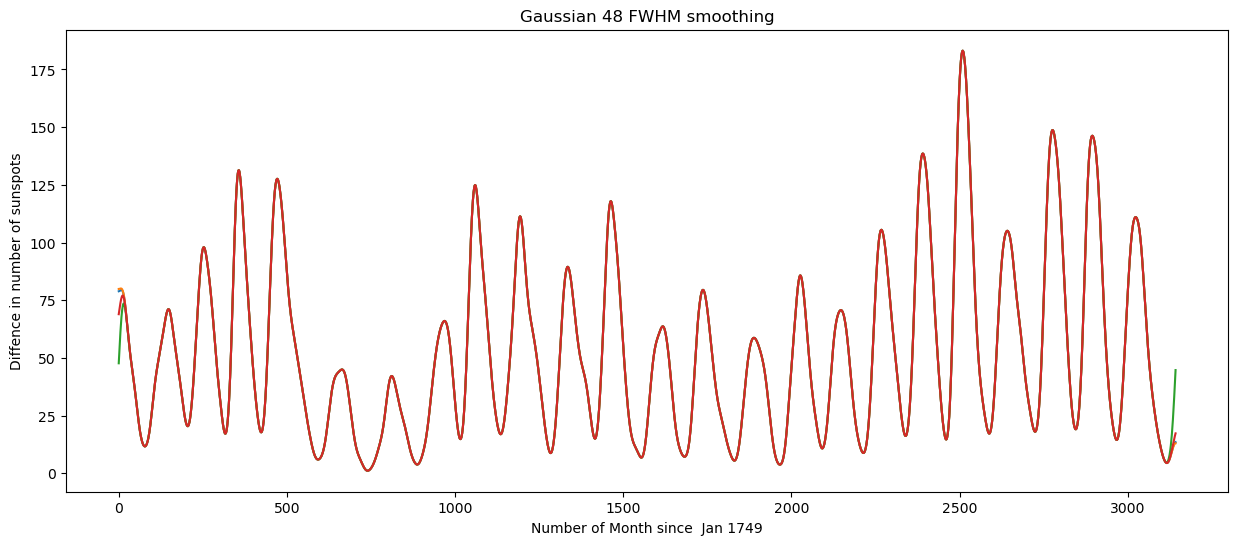

In [36]:
# Try some different edge conditions:


fwhm = 24
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
ssn_gauss_24 = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='reflect')
ssn_gauss_mirror = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='mirror')
ssn_gauss_wrap = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='wrap')
ssn_gauss_nearest = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='nearest')


plt.figure(figsize=(15,6))

plt.plot(ssn_gauss_24)
plt.plot(ssn_gauss_mirror)
plt.plot(ssn_gauss_wrap)
plt.plot(ssn_gauss_nearest)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.xlim([3120,3143])
plt.show()



#fwhm = 300
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
ssn_gauss = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='reflect')
ssn_gauss_mirror = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='mirror')
ssn_gauss_wrap = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='wrap')
ssn_gauss_nearest = scipy_ndimage.gaussian_filter1d(y_n,sigma,mode='nearest')


plt.figure(figsize=(15,6))

#plt.plot(t_n,y_n)
plt.plot(ssn_gauss)
plt.plot(ssn_gauss_mirror)
plt.plot(ssn_gauss_wrap)
plt.plot(ssn_gauss_nearest)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


# Convolution

<h3>

What we are really doing for smoothing with these different shape is called convolution - we are convolving our data with some shape, which called a kernel.

Let's take a look at using convolution instead.  For this, we'll use scipy.signal.convolve

First, let's try a Gaussian again:
    
</h3>

sigma =  10.191861603456228


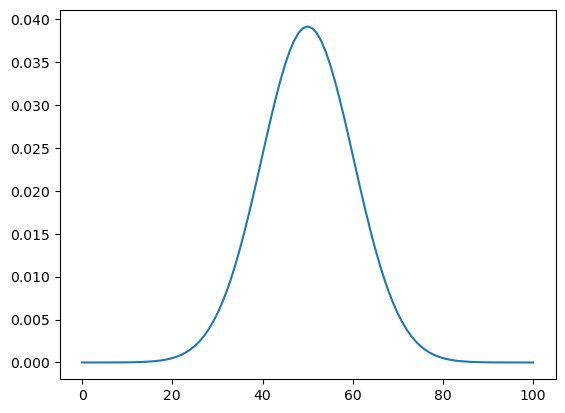

1.0000000000000002
101


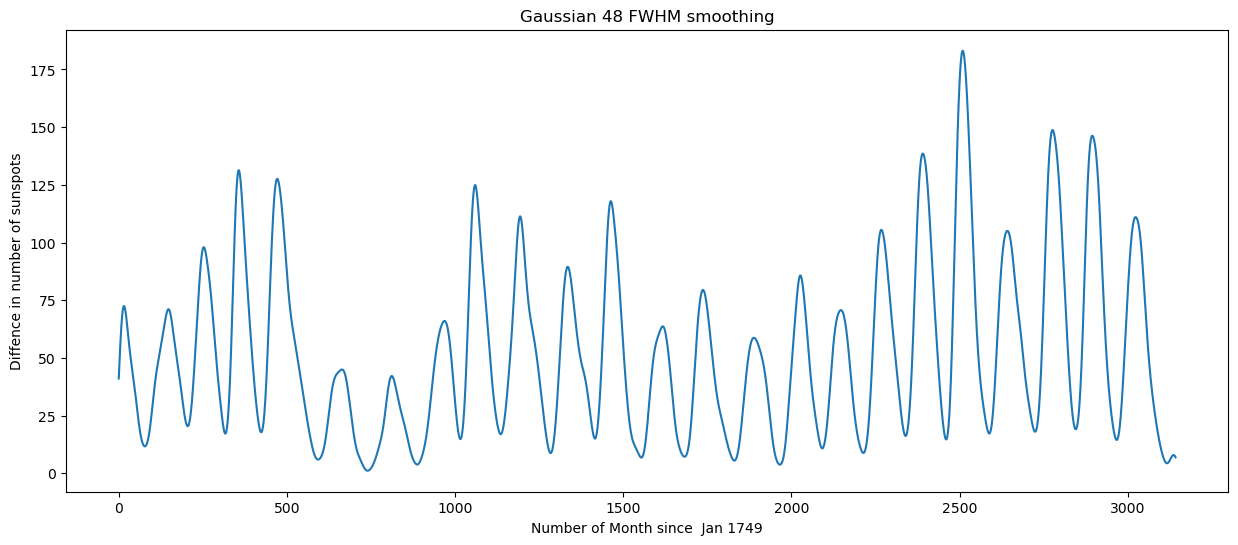

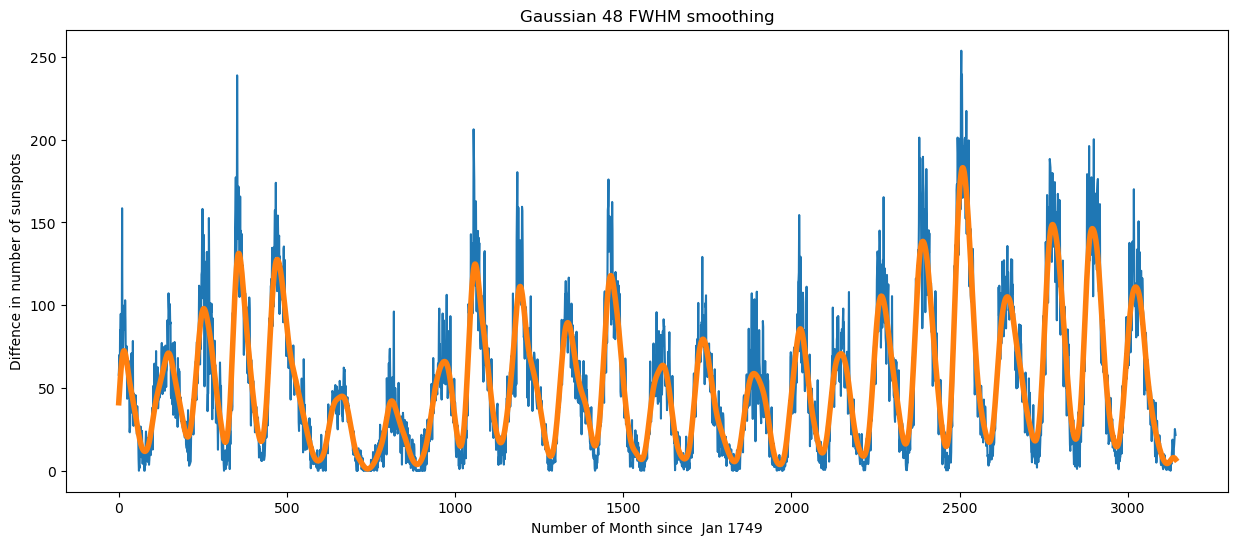

In [44]:

# Frst, try a Gaussian kernel:

fwhm = 24
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
print('sigma = ',sigma)

kernel = scipy_signal.windows.gaussian(int(sigma*10),sigma)  # set up a Gaussian
kernel = kernel/np.sum(kernel)    # normalize so the total of the kernel is 1

plt.plot(kernel)
plt.show()
print(np.sum(kernel))
print(kernel.size)

ssn_gauss_c = scipy_signal.convolve(y_n,kernel,mode='same')


plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_gauss_c)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_n,ssn_gauss_c,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()



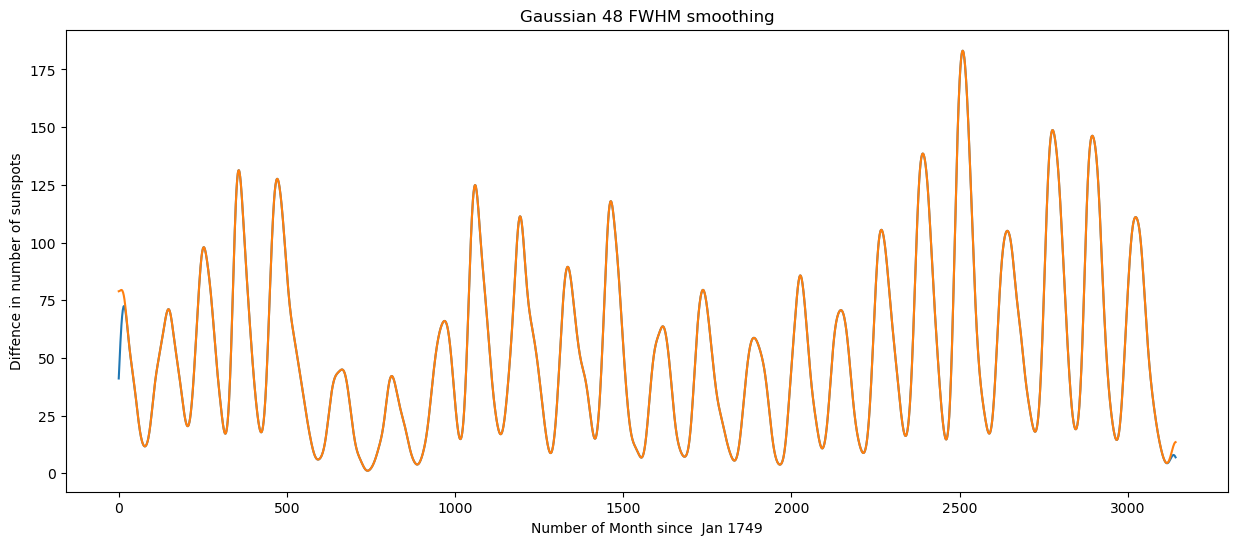

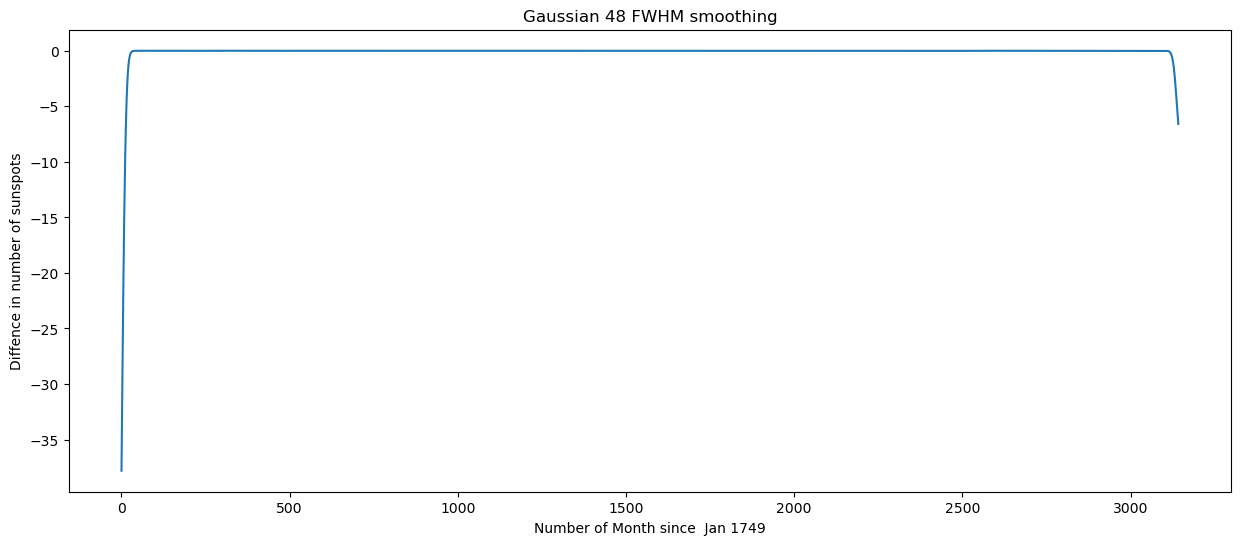

In [45]:
# Compare with what we did before:

plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_gauss_c)
plt.plot(t_n,ssn_gauss)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()

plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_gauss_c-ssn_gauss)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()



<h3>

Looks the same, except at the end.

Let's look at a square or triangle as well
    
</h3>

49.0


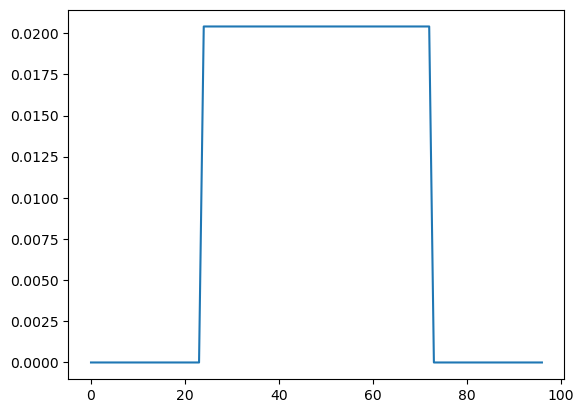

97


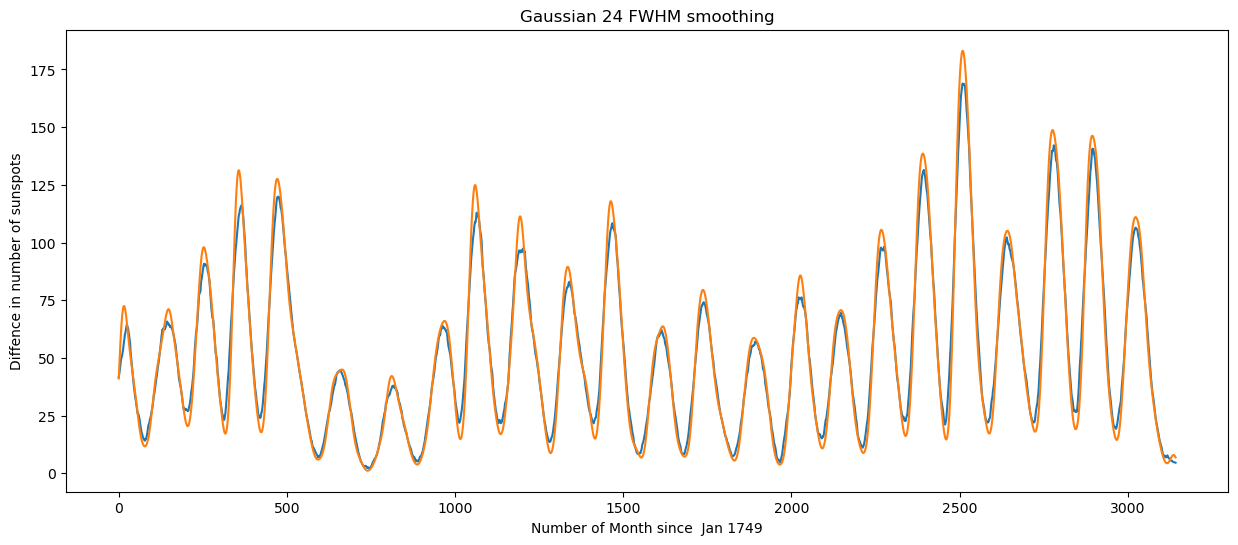

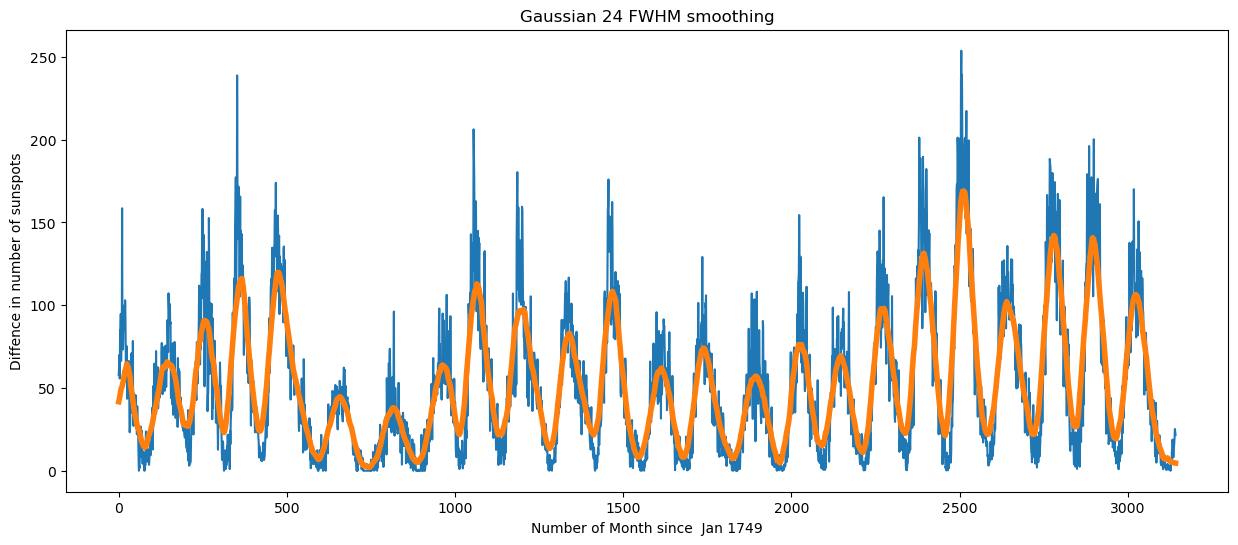

In [55]:
# moving average filter:

N_avg = 24  # number of month to smooth over

kernel = np.zeros(N_avg*4+1)

kernel[N_avg:-N_avg]=1

print(np.sum(kernel))
kernel = kernel/np.sum(kernel)    # normalize so the total of the kernel is 1

plt.plot(kernel)
plt.show()
print(kernel.size)

ssn_square_c = scipy_signal.convolve(y_n,kernel,mode='same')

plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_square_c)
plt.plot(t_n,ssn_gauss_c)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_n,ssn_square_c,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


25.0


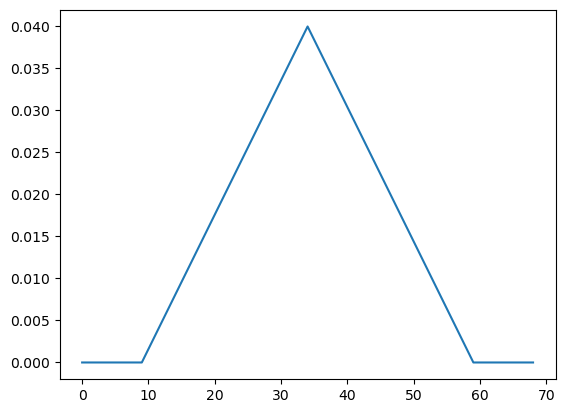

69


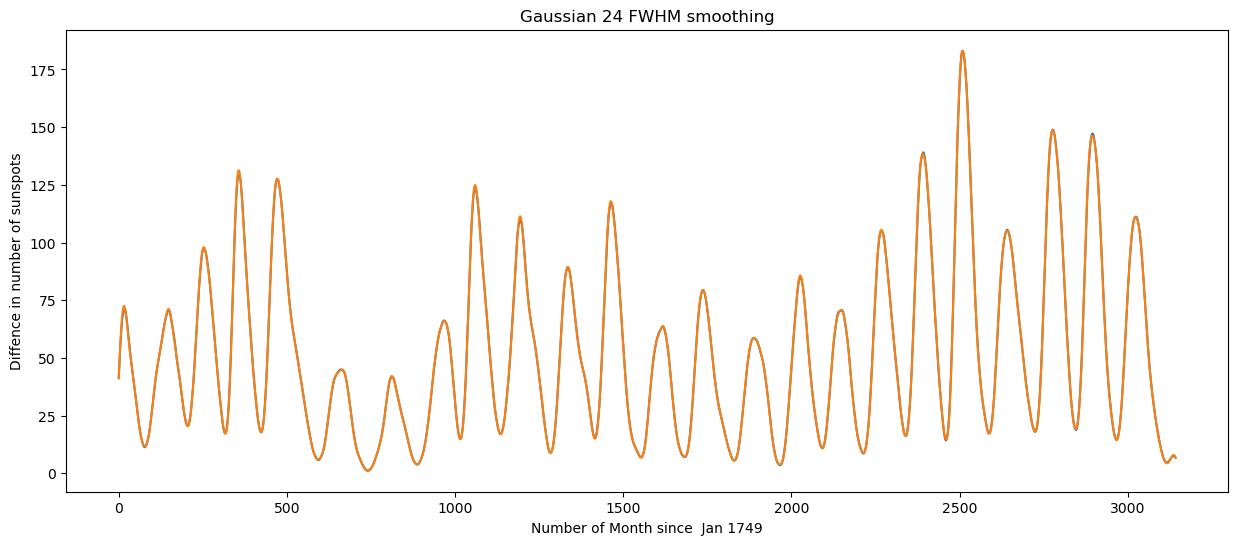

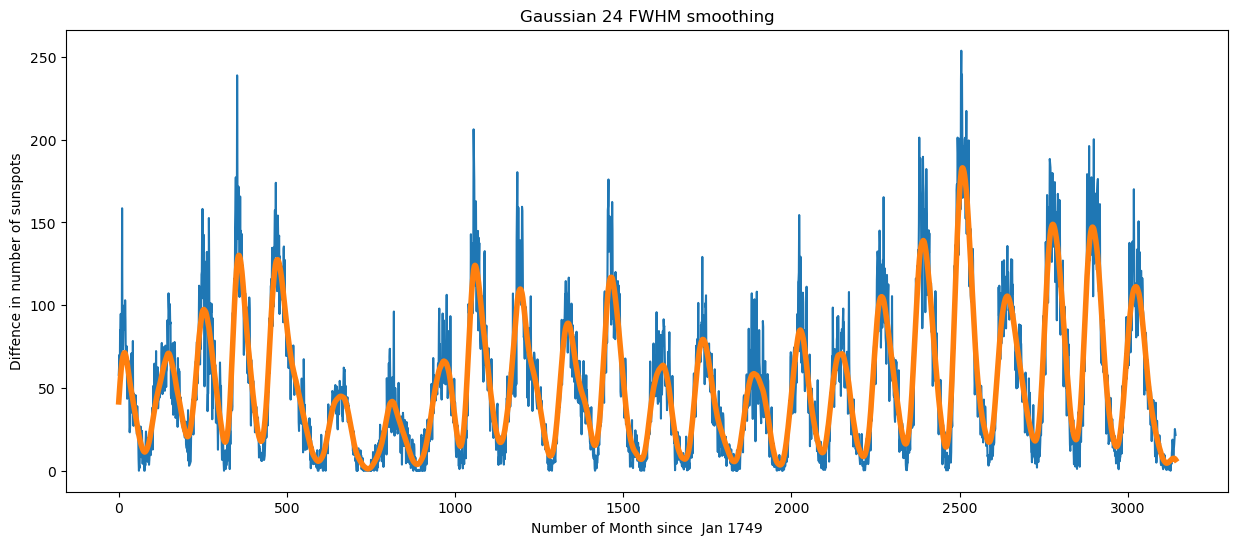

In [56]:
# Now a triangle kernel

N_avg = 24  # number of month to smooth over

#kernel = np.zeros(N_avg*4+1)

xx = np.arange(-N_avg-10,N_avg+11)
kernel = np.fmax(1-np.abs(xx)/(N_avg+1),np.zeros(xx.size))

print(np.sum(kernel))
kernel = kernel/np.sum(kernel)    # normalize so the total of the kernel is 1

plt.plot(kernel)
plt.show()
print(kernel.size)

ssn_triangle_c = scipy_signal.convolve(y_n,kernel,mode='same')

plt.figure(figsize=(15,6))

plt.plot(t_n,ssn_triangle_c)
plt.plot(t_n,ssn_gauss_c)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


plt.figure(figsize=(15,6))

plt.plot(t_n,y_n)
plt.plot(t_n,ssn_triangle_c,linewidth=4)
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Diffence in number of sunspots")
plt.title('Gaussian '+str(N_avg)+' FWHM smoothing')
plt.show()


# 2D smoothing

<h3>

Let's try some smoothing with an image.  This is some 2D data.

First, import the image.
    
</h3>

(3024, 4032, 3)
(4032, 3024, 3)


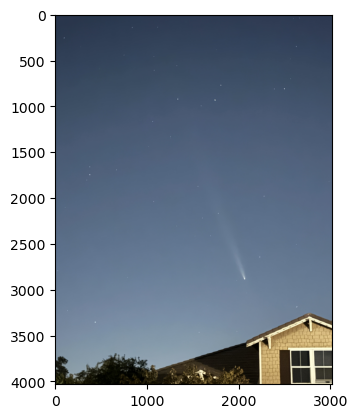

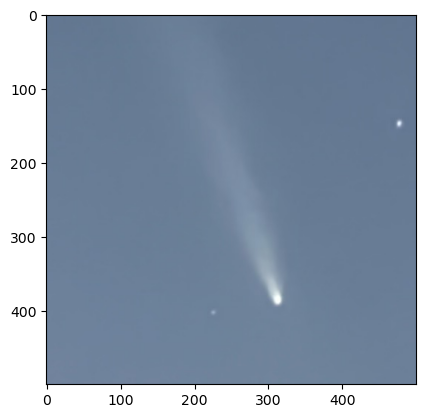

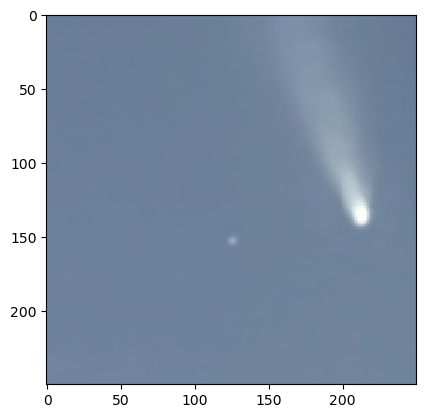

In [112]:
# Try using matplotlib.image

comet = image.imread('IMG_7900.jpg')

print(comet.shape)

# This gives us a 3-color image.

# Need to rotate 270 degrees

comet = np.rot90(comet,3)

print(comet.shape)

plt.imshow(comet)
plt.show()

# Now zoom in and take a closer look:

plt.imshow(comet[2500:3000,1750:2250,:])
plt.show()


# Now some more:

plt.imshow(comet[2750:3000,1850:2100,:],interpolation='none')
plt.show()


<h3>

Starting to see a little noise here.  Let's take a look at each color:

</h3>

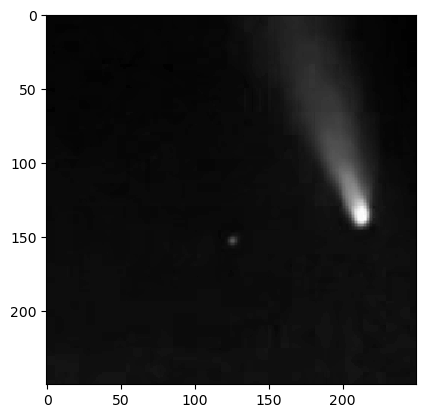

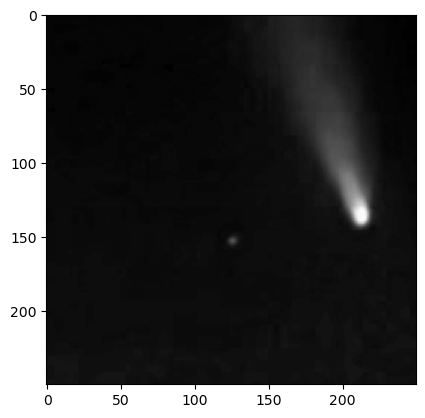

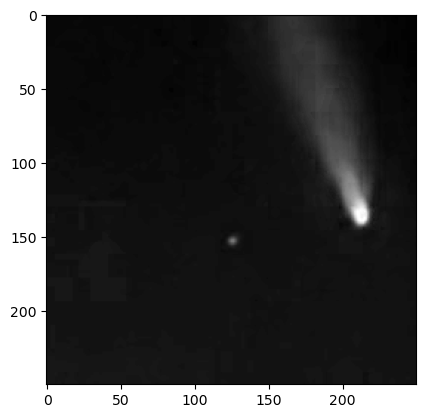

In [113]:
plt.imshow(comet[2750:3000,1850:2100,0],cmap='gray',interpolation='none')
plt.show()

plt.imshow(comet[2750:3000,1850:2100,0],cmap='gray')
plt.show()

plt.imshow(comet[2750:3000,1850:2100,2],cmap='gray')
plt.show()



<h3>

Now we see some noise.

Let's try applying a Gaussian filter by convolution on each band:
    
</h3>

sigma =  4.2466090014400955
(43, 43, 2)


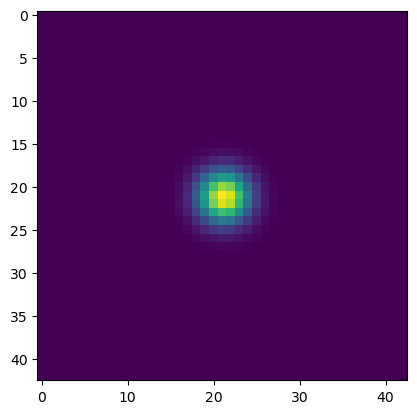

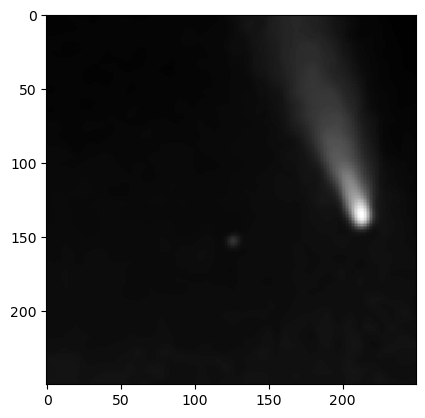

In [117]:

comet2 = np.copy(comet)

fwhm = 10  # in pixels
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
print('sigma = ',sigma)

#kernel = scipy_signal.windows.gaussian(int(sigma*10),sigma)  # set up a Gaussian
#kernel = kernel/np.sum(kernel)    # normalize so the total of the kernel is 1

gx = np.arange(-5*sigma,5*sigma)
gy = gx
#print(gx)
gxx,gyy = np.meshgrid(gx,gy)
#gr = np.sqrt(gxx**2+gyy**2)

gr = np.dstack((gxx, gyy))

print(gr.shape)
gauss2d = scipy_stats.multivariate_normal.pdf(gr,mean=[0,0],cov=[[sigma,0],[0,sigma]])


plt.imshow(gauss2d)
plt.show()

#print(np.sum(kernel))
#print(kernel.size)
#

comet2[:,:,0] = scipy_signal.convolve(comet[:,:,0],gauss2d,mode='same')
comet2[:,:,1] = scipy_signal.convolve(comet[:,:,1],gauss2d,mode='same')
comet2[:,:,2] = scipy_signal.convolve(comet[:,:,2],gauss2d,mode='same')

plt.imshow(comet2[2750:3000,1850:2100,0],cmap='gray',interpolation='none')
plt.show()

#plt.imshow(comet2[2500:2550,1850:1900,0],cmap='gray',interpolation='none')
#plt.show()


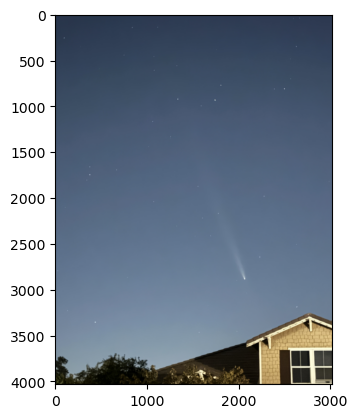

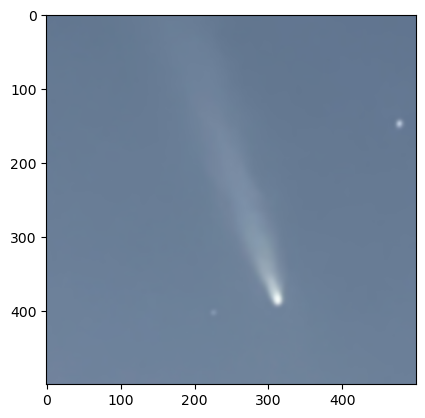

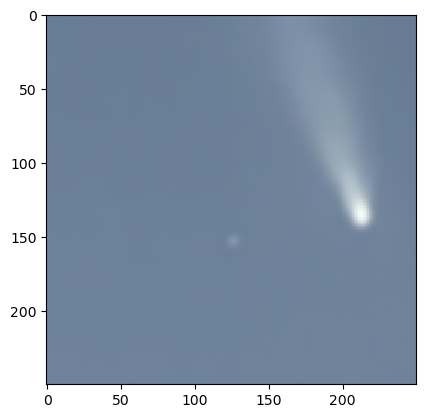

In [121]:
plt.imshow(comet2)
plt.show()

# Now zoom in and take a closer look:

plt.imshow(comet2[2500:3000,1750:2250,:])
plt.show()


# Now some more:

plt.imshow(comet2[2750:3000,1850:2100,:],interpolation='none')
plt.show()
